In [1]:
import ROOT
import os
import time
from CMS_lumi import CMS_lumi
from sigmaEff import sigmaEff
from glob import glob
import numpy as np

Welcome to JupyROOT 6.24/02


In [2]:
ROOT.EnableImplicitMT(10)
infiles_bkg = glob("../miniTree/*/miniTree_GJets_*.root")
df_bkg = ROOT.RDataFrame("miniTree", infiles_bkg).Filter("elePresel_Lead == 1 && nGsfMatchToReco_Lead >= 2 && eleCalibPt_Lead > 25 && abs(eleSCEta_Lead) < 1.4442 && convVtxRadius_Lead > 0").Define("radius", "sqrt(convVtxRadius_Lead)")

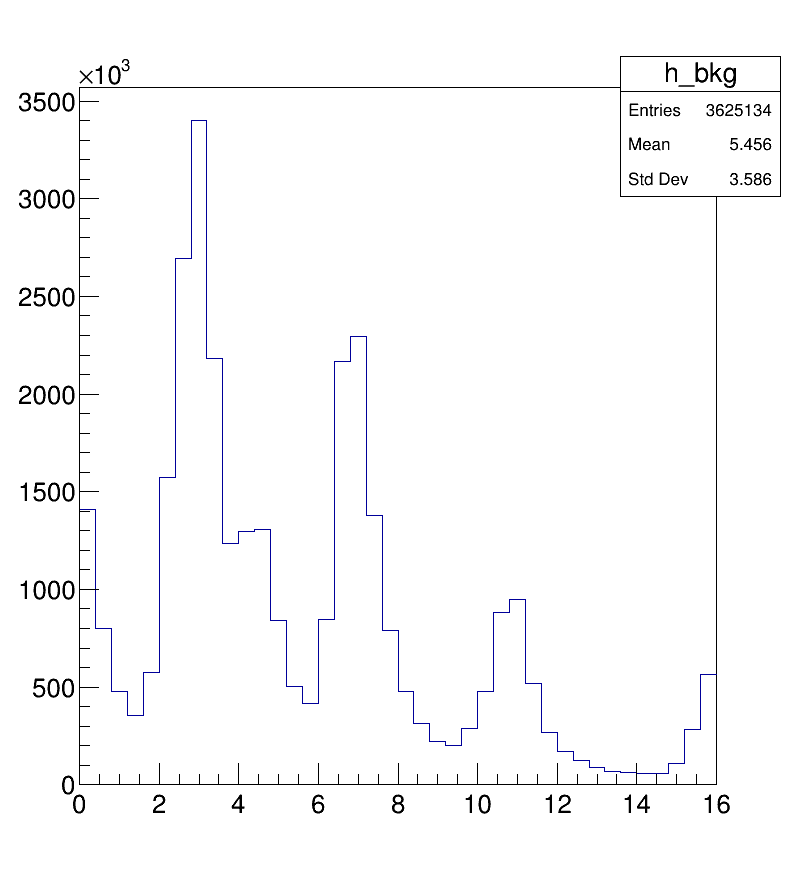

In [3]:
h_bkg = df_bkg.Histo1D(("h_bkg", " ", 40, 0, 16), "convL0_Lead", "wei")

c = ROOT.TCanvas("c", "c", 800, 900)
h_bkg.Draw("Hist")
c.Draw()

In [4]:
infiles_sig = glob("../miniTree/*/miniTree_HDalitz_*_eeg_125_*.root")
df_sig = ROOT.RDataFrame("miniTree", infiles_sig).Filter("category == 2 && elePresel_Lead == 1 && nGsfMatchToReco_Lead >= 2 && eleCalibPt_Lead > 25 && abs(eleSCEta_Lead) < 1.4442 && convVtxRadius_Lead > 0").Define("radius", "sqrt(convVtxRadius_Lead)")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


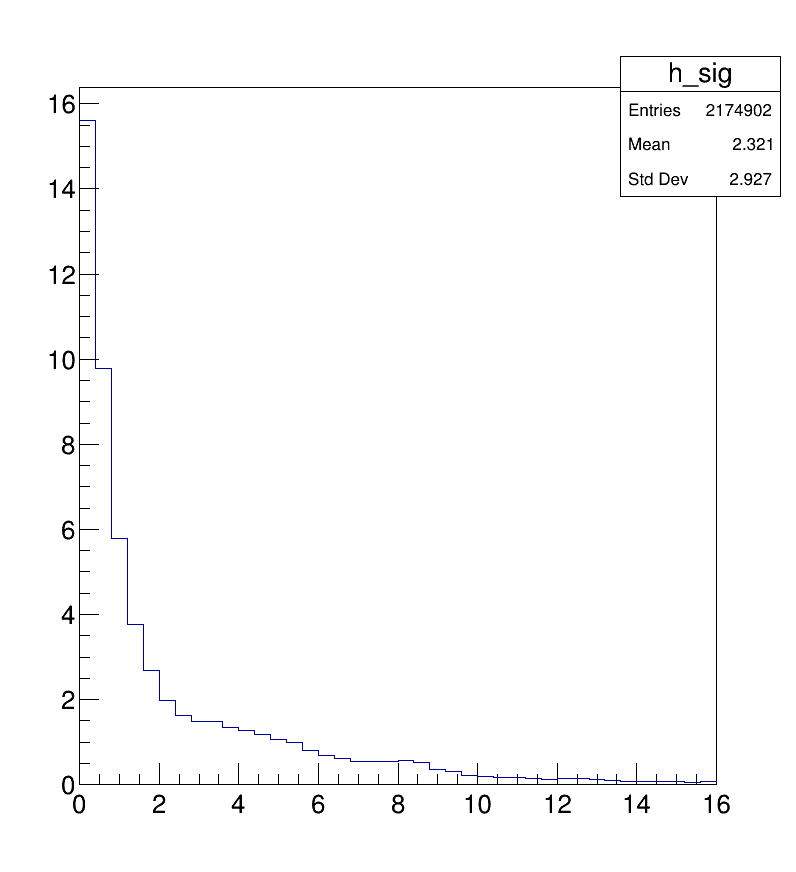

In [5]:
h_sig = df_sig.Histo1D(("h_sig", " ", 40, 0, 16), "convL0_Lead", "wei")

c = ROOT.TCanvas("c", "c", 800, 900)
h_sig.Draw("Hist")
c.Draw()

0.0118680050034467
Best cut value for r_{conv} is 0.0


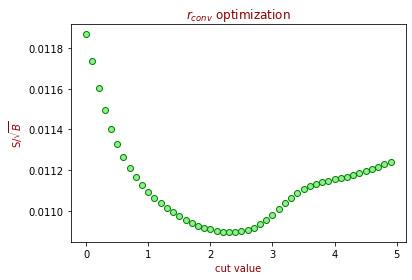

In [7]:
import matplotlib.pyplot as plt

ams = []
xbins = np.arange(0, 5, 0.1)
for j in xbins:
    s = df_sig.Filter("convL0_Lead > {} || eleTrkMissHits_Lead < 1".format(j)).Sum("wei")
    b = df_bkg.Filter("convL0_Lead > {} || eleTrkMissHits_Lead < 1".format(j)).Sum("wei")
    AMS = s.GetValue()/ROOT.TMath.Sqrt(b.GetValue())
    ams.append(AMS)
    
# 0.029132958920163838
# s = df_sig.Filter("eleConvVeto_Lead == 1").Sum("wei")
# b = df_bkg.Filter("eleConvVeto_Lead == 1").Sum("wei")
# AMS = s.GetValue()/ROOT.TMath.Sqrt(b.GetValue())
# ams.append(AMS)

print(np.max(ams))
# xmax = xbins[np.argmax(ams)]
# ymax = np.max(ams)

font = {
    "color":  "darkred",
    "weight": "normal",
}
    
plt.tight_layout()
plt.scatter(xbins, ams, color="lightgreen", edgecolor="green") 
plt.title("{} optimization".format("$r_{conv}$"), **font)
plt.ylabel("S/$\sqrt{B}$", **font)
plt.xlabel("cut value", **font) 
plt.savefig("../plots/{}.pdf".format("r_{conv}"))        
plt.plot()
print("Best cut value for {} is {}".format("r_{conv}", xbins[np.argmax(ams)]))   